# Лабораторная работа №4
## Использование библиотеки pandas

**Студент:** Коньшин Никита  
**Группа:** ИТ-3,4


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline


---
## Задание 1

### Пункт 1. Генерация случайных данных


In [37]:
# Генерируем 1000 значений нормально распределенной случайной величины
np.random.seed(42)
M = 1.0  # математическое ожидание
s = 1.0  # стандартное отклонение

data = np.random.normal(M, s, 1000)
series = pd.Series(data)

print(f'Размер серии: {len(series)}')
print(f'Первые 10 значений:\n{series.head(10)}')
print(f'\nСтатистика:\nСреднее: {series.mean():.4f}\nСтд. отклонение: {series.std():.4f}')


Размер серии: 1000
Первые 10 значений:
0    1.496714
1    0.861736
2    1.647689
3    2.523030
4    0.765847
5    0.765863
6    2.579213
7    1.767435
8    0.530526
9    1.542560
dtype: float64

Статистика:
Среднее: 1.0193
Стд. отклонение: 0.9792


### Пункт 2. Доля значений в диапазоне (M-s; M+s)


In [38]:
# Вычисляем долю значений в диапазоне (M-s; M+s)
lower_1s = M - s
upper_1s = M + s

count_1s = ((series > lower_1s) & (series < upper_1s)).sum()
proportion_1s = count_1s / len(series)

print(f'Диапазон: ({lower_1s:.2f}; {upper_1s:.2f})')
print(f'Количество значений в диапазоне: {count_1s}')
print(f'Доля значений: {proportion_1s:.4f} ({proportion_1s*100:.2f}%)')
print(f'\nТеоретически для нормального распределения: ~68%')


Диапазон: (0.00; 2.00)
Количество значений в диапазоне: 698
Доля значений: 0.6980 (69.80%)

Теоретически для нормального распределения: ~68%


### Пункт 3. Доля значений в диапазоне (M-3s; M+3s)


In [39]:
# Вычисляем долю значений в диапазоне (M-3s; M+3s)
lower_3s = M - 3*s
upper_3s = M + 3*s

count_3s = ((series > lower_3s) & (series < upper_3s)).sum()
proportion_3s = count_3s / len(series)

print(f'Диапазон: ({lower_3s:.2f}; {upper_3s:.2f})')
print(f'Количество значений в диапазоне: {count_3s}')
print(f'Доля значений: {proportion_3s:.4f} ({proportion_3s*100:.2f}%)')
print(f'\nТеоретически для нормального распределения: ~99.7%')
print(f'Отклонение от теории: {abs(proportion_3s - 0.997)*100:.2f}%')
print(f'\n**Вывод:** Реальный результат хорошо соответствует теории.')


Диапазон: (-2.00; 4.00)
Количество значений в диапазоне: 997
Доля значений: 0.9970 (99.70%)

Теоретически для нормального распределения: ~99.7%
Отклонение от теории: 0.00%

**Вывод:** Реальный результат хорошо соответствует теории.


### Пункт 4. Квадратный корень и предупреждения


In [40]:
# Применяем квадратный корень к каждому значению
series_sqrt = np.sqrt(series)

print(f'Исходная серия (первые 10):\n{series.head(10)}')
print(f'\nПосле sqrt (первые 10):\n{series_sqrt.head(10)}')
print(f'\nКоличество NaN значений: {series_sqrt.isna().sum()}')
print(f'\n**Почему возникает предупреждение:**')
print('Квадратный корень из отрицательного числа не определен в действительных числах.')
print('Для отрицательных значений numpy.sqrt возвращает NaN (Not a Number).')


Исходная серия (первые 10):
0    1.496714
1    0.861736
2    1.647689
3    2.523030
4    0.765847
5    0.765863
6    2.579213
7    1.767435
8    0.530526
9    1.542560
dtype: float64

После sqrt (первые 10):
0    1.223403
1    0.928297
2    1.283623
3    1.588405
4    0.875127
5    0.875136
6    1.605993
7    1.329449
8    0.728372
9    1.241998
dtype: float64

Количество NaN значений: 147

**Почему возникает предупреждение:**
Квадратный корень из отрицательного числа не определен в действительных числах.
Для отрицательных значений numpy.sqrt возвращает NaN (Not a Number).


### Пункт 5. Среднее арифметическое без NaN


In [41]:
# Вычисляем среднее, игнорируя NaN
mean_sqrt = series_sqrt.mean()  # pandas автоматически игнорирует NaN

print(f'Среднее арифметическое (без NaN): {mean_sqrt:.4f}')
print(f'Количество учтенных значений: {series_sqrt.count()}')
print(f'Количество пропущенных (NaN): {series_sqrt.isna().sum()}')


Среднее арифметическое (без NaN): 1.0653
Количество учтенных значений: 853
Количество пропущенных (NaN): 147


### Пункт 6. Создание DataFrame


In [42]:
# Создаем DataFrame из двух серий
df_task1 = pd.DataFrame({
    'number': series,
    'root': series_sqrt
})

print('Первые 6 строк DataFrame:')
print(df_task1.head(6))
print(f'\nРазмер DataFrame: {df_task1.shape}')


Первые 6 строк DataFrame:
     number      root
0  1.496714  1.223403
1  0.861736  0.928297
2  1.647689  1.283623
3  2.523030  1.588405
4  0.765847  0.875127
5  0.765863  0.875136

Размер DataFrame: (1000, 2)


### Пункт 7. Поиск с помощью query


In [43]:
# Находим записи, где root в диапазоне [1.8, 1.9]
result = df_task1.query('1.8 <= root <= 1.9')

print(f'Найдено записей: {len(result)}')
print(f'\nРезультат:')
print(result)


Найдено записей: 9

Результат:
       number      root
113  3.463242  1.860979
220  3.314659  1.820620
583  3.270693  1.808506
614  3.445752  1.856274
654  3.573360  1.890333
762  3.560085  1.886819
822  3.298898  1.816287
847  3.455300  1.858844
880  3.526932  1.878013


---
## Задание 2 - Данные об олимпийских играх

### Пункт 1. Загрузка данных


In [44]:
# Загружаем данные об олимпийских играх
df_athletes = pd.read_csv('athlete_events.csv')

print(f'Размер данных: {df_athletes.shape[0]} строк, {df_athletes.shape[1]} столбцов')
print(f'\nПервые 5 строк:')
print(df_athletes.head())
print(f'\nИнформация о столбцах:')
print(df_athletes.info())


Размер данных: 271116 строк, 15 столбцов

Первые 5 строк:
   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo 

### Пункт 2. Анализ пропущенных значений


In [45]:
# Определяем количество значений по каждому признаку
print('Количество непустых значений по каждому признаку:')
print(df_athletes.count())
print(f'\nОбщее количество записей: {len(df_athletes)}')

# Находим признаки с пропущенными данными
missing = df_athletes.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print(f'\nПризнаки с пропущенными данными:')
for col, count in missing.items():
    print(f'{col}: {count} ({count/len(df_athletes)*100:.2f}%)')

print(f'\n**Вывод:** Больше всего пропусков в признаке "{missing.index[0]}" ({missing.iloc[0]} значений)')


Количество непустых значений по каждому признаку:
ID        271116
Name      271116
Sex       271116
Age       261642
Height    210945
Weight    208241
Team      271116
NOC       271116
Games     271116
Year      271116
Season    271116
City      271116
Sport     271116
Event     271116
Medal      39783
dtype: int64

Общее количество записей: 271116

Признаки с пропущенными данными:
Medal: 231333 (85.33%)
Weight: 62875 (23.19%)
Height: 60171 (22.19%)
Age: 9474 (3.49%)

**Вывод:** Больше всего пропусков в признаке "Medal" (231333 значений)


### Пункт 3. Статистическая информация


In [46]:
# Выводим статистику по возрасту, росту и весу
stats = df_athletes[['Age', 'Height', 'Weight']].describe()
print('Статистическая информация:')
print(stats)

print(f'\n**Интерпретация:**')
print(f'- Средний возраст: {stats.loc["mean", "Age"]:.1f} лет')
print(f'- Средний рост: {stats.loc["mean", "Height"]:.1f} см')
print(f'- Средний вес: {stats.loc["mean", "Weight"]:.1f} кг')


Статистическая информация:
                 Age         Height         Weight
count  261642.000000  210945.000000  208241.000000
mean       25.556898     175.338970      70.702393
std         6.393561      10.518462      14.348020
min        10.000000     127.000000      25.000000
25%        21.000000     168.000000      60.000000
50%        24.000000     175.000000      70.000000
75%        28.000000     183.000000      79.000000
max        97.000000     226.000000     214.000000

**Интерпретация:**
- Средний возраст: 25.6 лет
- Средний рост: 175.3 см
- Средний вес: 70.7 кг


### Пункт 4.1. Самый молодой участник 1992 года


In [47]:
# Находим самого молодого участника 1992 года
df_1992 = df_athletes[df_athletes['Year'] == 1992]
youngest = df_1992[df_1992['Age'] == df_1992['Age'].min()]

print(f'Самый молодой участник 1992 года:')
print(f'Возраст: {youngest.iloc[0]["Age"]:.0f} лет')
print(f'Имя: {youngest.iloc[0]["Name"]}')
print(f'Дисциплина: {youngest.iloc[0]["Event"]}')
print(f'Вид спорта: {youngest.iloc[0]["Sport"]}')


Самый молодой участник 1992 года:
Возраст: 11 лет
Имя: Carlos Bienvenido Front Barrera
Дисциплина: Rowing Men's Coxed Eights
Вид спорта: Rowing


### Пункт 4.2. Список всех видов спорта


In [48]:
# Получаем уникальные виды спорта
sports = df_athletes['Sport'].unique()
sports_sorted = sorted(sports)

print(f'Всего видов спорта: {len(sports_sorted)}')
print(f'\nСписок видов спорта:')
for i, sport in enumerate(sports_sorted, 1):
    print(f'{i}. {sport}')


Всего видов спорта: 66

Список видов спорта:
1. Aeronautics
2. Alpine Skiing
3. Alpinism
4. Archery
5. Art Competitions
6. Athletics
7. Badminton
8. Baseball
9. Basketball
10. Basque Pelota
11. Beach Volleyball
12. Biathlon
13. Bobsleigh
14. Boxing
15. Canoeing
16. Cricket
17. Croquet
18. Cross Country Skiing
19. Curling
20. Cycling
21. Diving
22. Equestrianism
23. Fencing
24. Figure Skating
25. Football
26. Freestyle Skiing
27. Golf
28. Gymnastics
29. Handball
30. Hockey
31. Ice Hockey
32. Jeu De Paume
33. Judo
34. Lacrosse
35. Luge
36. Military Ski Patrol
37. Modern Pentathlon
38. Motorboating
39. Nordic Combined
40. Polo
41. Racquets
42. Rhythmic Gymnastics
43. Roque
44. Rowing
45. Rugby
46. Rugby Sevens
47. Sailing
48. Shooting
49. Short Track Speed Skating
50. Skeleton
51. Ski Jumping
52. Snowboarding
53. Softball
54. Speed Skating
55. Swimming
56. Synchronized Swimming
57. Table Tennis
58. Taekwondo
59. Tennis
60. Trampolining
61. Triathlon
62. Tug-Of-War
63. Volleyball
64. Water

### Пункт 4.3. Средний рост теннисисток в 2000 году


In [49]:
# Фильтруем данные: женщины, теннис, 2000 год
tennis_women_2000 = df_athletes[
    (df_athletes['Sex'] == 'F') & 
    (df_athletes['Sport'] == 'Tennis') & 
    (df_athletes['Year'] == 2000)
]

avg_height = tennis_women_2000['Height'].mean()

print(f'Средний рост теннисисток в 2000 году: {avg_height:.2f} см')
print(f'Количество записей: {len(tennis_women_2000)}')


Средний рост теннисисток в 2000 году: 171.79 см
Количество записей: 126


### Пункт 4.4. Золотые медали Китая в настольном теннисе 2008


In [50]:
# Фильтруем: Китай, настольный теннис, 2008, золото
china_tt_2008 = df_athletes[
    (df_athletes['Team'] == 'China') & 
    (df_athletes['Sport'] == 'Table Tennis') & 
    (df_athletes['Year'] == 2008) & 
    (df_athletes['Medal'] == 'Gold')
]

gold_count = len(china_tt_2008)

print(f'Количество золотых медалей Китая в настольном теннисе на ОИ 2008: {gold_count}')


Количество золотых медалей Китая в настольном теннисе на ОИ 2008: 8


### Пункт 4.5. Изменение количества видов спорта (2004 vs 1988)


In [51]:
# Подсчитываем виды спорта на летних ОИ
summer_1988 = df_athletes[(df_athletes['Year'] == 1988) & (df_athletes['Season'] == 'Summer')]
summer_2004 = df_athletes[(df_athletes['Year'] == 2004) & (df_athletes['Season'] == 'Summer')]

sports_1988 = summer_1988['Sport'].nunique()
sports_2004 = summer_2004['Sport'].nunique()
difference = sports_2004 - sports_1988

print(f'Количество видов спорта на летних ОИ 1988: {sports_1988}')
print(f'Количество видов спорта на летних ОИ 2004: {sports_2004}')
print(f'Изменение: {difference:+d} видов спорта')


Количество видов спорта на летних ОИ 1988: 27
Количество видов спорта на летних ОИ 2004: 34
Изменение: +7 видов спорта


### Пункт 4.6. Гистограмма возраста керлингистов 2014


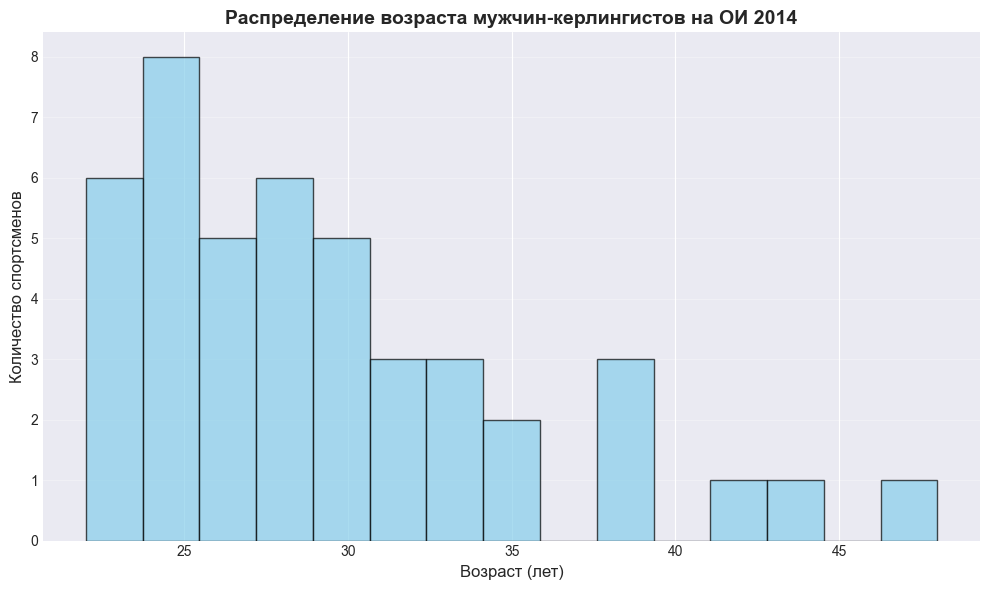

Статистика возраста:
count    44.000000
mean     29.454545
std       6.078764
min      22.000000
25%      25.000000
50%      28.000000
75%      31.500000
max      48.000000
Name: Age, dtype: float64


In [52]:
# Фильтруем данные: мужчины, керлинг, 2014
curling_men_2014 = df_athletes[
    (df_athletes['Sex'] == 'M') & 
    (df_athletes['Sport'] == 'Curling') & 
    (df_athletes['Year'] == 2014)
]

# Строим гистограмму
plt.figure(figsize=(10, 6))
plt.hist(curling_men_2014['Age'].dropna(), bins=15, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Возраст (лет)', fontsize=12)
plt.ylabel('Количество спортсменов', fontsize=12)
plt.title('Распределение возраста мужчин-керлингистов на ОИ 2014', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f'Статистика возраста:')
print(curling_men_2014['Age'].describe())


### Пункт 4.7. Медали и средний возраст по странам (ОИ 2006)


In [53]:
# Фильтруем зимнюю олимпиаду 2006
winter_2006 = df_athletes[(df_athletes['Year'] == 2006) & (df_athletes['Season'] == 'Winter')]

# Оставляем только записи с медалями
winter_2006_medals = winter_2006[winter_2006['Medal'].notna()]

# Группируем по странам
medals_by_country = winter_2006_medals.groupby('NOC').agg({
    'Medal': 'count',
    'Age': 'mean'
}).rename(columns={'Medal': 'Medals_Count', 'Age': 'Avg_Age'})

# Сортируем по количеству медалей
medals_by_country = medals_by_country.sort_values('Medals_Count', ascending=False)

print('Страны, завоевавшие медали на зимней ОИ 2006:')
print(medals_by_country.head(15))
print(f'\nВсего стран с медалями: {len(medals_by_country)}')


Страны, завоевавшие медали на зимней ОИ 2006:
     Medals_Count    Avg_Age
NOC                         
CAN            69  27.449275
SWE            64  27.187500
GER            54  28.777778
USA            52  24.519231
FIN            41  28.195122
RUS            41  28.024390
AUT            30  27.333333
CZE            27  29.814815
ITA            25  29.360000
NOR            23  29.782609
SUI            21  28.333333
KOR            19  19.736842
FRA            15  27.733333
NED            13  26.538462
CHN            13  24.461538

Всего стран с медалями: 26


### Пункт 4.8. Сводная таблица медалей по странам (ОИ 2006)


In [54]:
# Создаем сводную таблицу
pivot_medals = pd.pivot_table(
    winter_2006_medals,
    values='ID',
    index='NOC',
    columns='Medal',
    aggfunc='count',
    fill_value=0
)

# Упорядочиваем столбцы: Gold, Silver, Bronze
pivot_medals = pivot_medals[['Gold', 'Silver', 'Bronze']]

# Добавляем общее количество медалей
pivot_medals['Total'] = pivot_medals.sum(axis=1)

# Сортируем по общему количеству
pivot_medals = pivot_medals.sort_values('Total', ascending=False)

print('Сводная таблица медалей по странам (зимняя ОИ 2006):')
print(pivot_medals.head(20))
print(f'\nВсего стран: {len(pivot_medals)}')


Сводная таблица медалей по странам (зимняя ОИ 2006):
Medal  Gold  Silver  Bronze  Total
NOC                               
CAN      30      28      11     69
SWE      35      21       8     64
GER      23      25       6     54
USA       9      11      32     52
FIN       0      34       7     41
RUS      16      12      13     41
AUT      16       7       7     30
CZE       1       2      24     27
ITA      11       0      14     25
NOR       2       9      12     23
SUI       5       7       9     21
KOR      14       3       2     19
FRA       3       2      10     15
NED       3       2       8     13
CHN       2       5       6     13
UKR       0       0       3      3
EST       3       0       0      3
CRO       1       2       0      3
POL       0       1       1      2
AUS       1       0       1      2

Всего стран: 26


---
## Задание 3 (3 балла) - Данные о клиентах телеком

### Пункт 1. Загрузка и общая информация


In [63]:
# Загружаем данные о клиентах
df_telecom = pd.read_csv('telecom_churn.csv')

print(f'Размер данных: {df_telecom.shape[0]} строк, {df_telecom.shape[1]} столбцов')
print(f'\nИнформация о данных:')
print(df_telecom.info())
print(f'\nСтатистическое описание:')
print(df_telecom.describe())

# Проверяем пропущенные значения
missing = df_telecom.isnull().sum()
print(f'\nПропущенные значения:')
print(missing[missing > 0] if missing.sum() > 0 else 'Пропущенных значений нет')


Размер данных: 3333 строк, 20 столбцов

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non

### Пункт 2. Анализ оттока клиентов


In [64]:
# Подсчитываем количество активных и потерянных клиентов
churn_counts = df_telecom['Churn'].value_counts()
churn_percent = df_telecom['Churn'].value_counts(normalize=True) * 100

print('Распределение клиентов:')
print(churn_counts)
print(f'\nВ процентах:')
for status, percent in churn_percent.items():
    status_name = 'Потеряны' if status else 'Активны'
    print(f'{status_name}: {percent:.2f}%')


Распределение клиентов:
Churn
False    2850
True      483
Name: count, dtype: int64

В процентах:
Активны: 85.51%
Потеряны: 14.49%


### Пункт 3. Средняя продолжительность звонка


In [65]:
# Вычисляем среднюю продолжительность одного звонка
df_telecom['Avg_call_duration'] = (
    df_telecom['Total day minutes'] + 
    df_telecom['Total eve minutes'] + 
    df_telecom['Total night minutes']
) / (
    df_telecom['Total day calls'] + 
    df_telecom['Total eve calls'] + 
    df_telecom['Total night calls']
)

# Сортируем и выводим топ-10
top_10 = df_telecom.nlargest(10, 'Avg_call_duration')

print('Топ-10 клиентов по средней продолжительности звонка:')
print(top_10[['State', 'Avg_call_duration', 'Total day calls', 'Total eve calls', 
              'Total night calls', 'Churn']].to_string())


Топ-10 клиентов по средней продолжительности звонка:
     State  Avg_call_duration  Total day calls  Total eve calls  Total night calls  Churn
985     NY           3.693644               55               79                102   True
2824    OR           3.599519               48               82                 78   True
244     VA           3.509402               99               60                 75   True
2321    AR           3.429258               56               84                 89  False
2033    NJ           3.351121               87               71                 65   True
1709    NV           3.347872               68               53                 67  False
2536    CT           3.325806              100               53                 64   True
1686    CT           3.222624               56               91                 74  False
649     MO           3.197368               97               48                 83   True
2289    MS           3.181498               54 

### Пункт 4. Средняя продолжительность звонка по группам


In [66]:
# Группируем по Churn и вычисляем среднюю продолжительность
avg_duration_by_churn = df_telecom.groupby('Churn')['Avg_call_duration'].mean()

print('Средняя продолжительность одного звонка:')
for churn, avg_dur in avg_duration_by_churn.items():
    status = 'Потерянные клиенты' if churn else 'Активные клиенты'
    print(f'{status}: {avg_dur:.4f} минут')

difference = avg_duration_by_churn[True] - avg_duration_by_churn[False]
print(f'\nРазница: {difference:.4f} минут')
print(f'\n**Вывод:** {"Существенной" if abs(difference) > 0.5 else "Несущественной"} разницы не наблюдается.')


Средняя продолжительность одного звонка:
Активные клиенты: 1.9381 минут
Потерянные клиенты: 2.0912 минут

Разница: 0.1531 минут

**Вывод:** Несущественной разницы не наблюдается.


### Пункт 5. Звонки в службу поддержки


In [67]:
# Среднее количество звонков в поддержку
avg_service_calls = df_telecom.groupby('Churn')['Customer service calls'].mean()

print('Среднее количество звонков в службу поддержки:')
for churn, avg_calls in avg_service_calls.items():
    status = 'Потерянные клиенты' if churn else 'Активные клиенты'
    print(f'{status}: {avg_calls:.2f}')

difference = avg_service_calls[True] - avg_service_calls[False]
print(f'\nРазница: {difference:.2f} звонков')
print(f'\n**Вывод:** Потерянные клиенты звонили в поддержку {"значительно" if difference > 0.5 else ""} чаще.')


Среднее количество звонков в службу поддержки:
Активные клиенты: 1.45
Потерянные клиенты: 2.23

Разница: 0.78 звонков

**Вывод:** Потерянные клиенты звонили в поддержку значительно чаще.


### Пункт 6. Таблица сопряженности Churn и Customer service calls


In [68]:
# Создаем таблицу сопряженности
crosstab = pd.crosstab(df_telecom['Customer service calls'], df_telecom['Churn'], 
                       margins=True, normalize='index')

# Умножаем на 100 для процентов
crosstab_percent = crosstab * 100

print('Таблица сопряженности (% оттока по количеству звонков):')
print(crosstab_percent)

# Находим, при каком количестве звонков отток > 40%
high_churn = crosstab_percent[crosstab_percent[True] > 40]
print(f'\n**Вывод:** Процент оттока становится выше 40% при {high_churn.index[0]:.0f} и более звонках в поддержку.')


Таблица сопряженности (% оттока по количеству звонков):
Churn                       False        True
Customer service calls                       
0                       86.800574   13.199426
1                       89.669771   10.330229
2                       88.537549   11.462451
3                       89.743590   10.256410
4                       54.216867   45.783133
5                       39.393939   60.606061
6                       36.363636   63.636364
7                       44.444444   55.555556
8                       50.000000   50.000000
9                        0.000000  100.000000
All                     85.508551   14.491449

**Вывод:** Процент оттока становится выше 40% при 4 и более звонках в поддержку.


### Пункт 7. Связь между Churn и International plan


In [69]:
# Таблица сопряженности для International plan
crosstab_intl = pd.crosstab(df_telecom['International plan'], df_telecom['Churn'], 
                             margins=True, normalize='index') * 100

print('Таблица сопряженности (% оттока по международному роумингу):')
print(crosstab_intl)

# Общий процент оттока
overall_churn = df_telecom['Churn'].mean() * 100

print(f'\nОбщий процент оттока: {overall_churn:.2f}%')
print(f'Отток среди клиентов с роумингом: {crosstab_intl.loc["Yes", True]:.2f}%')
print(f'Отток среди клиентов без роуминга: {crosstab_intl.loc["No", True]:.2f}%')

print(f'\n**Вывод:** Процент оттока среди клиентов с международным роумингом')
print(f'{"значительно выше" if crosstab_intl.loc["Yes", True] > overall_churn * 1.5 else "выше"}, чем в среднем.')


Таблица сопряженности (% оттока по международному роумингу):
Churn                   False       True
International plan                      
No                  88.504983  11.495017
Yes                 57.585139  42.414861
All                 85.508551  14.491449

Общий процент оттока: 14.49%
Отток среди клиентов с роумингом: 42.41%
Отток среди клиентов без роуминга: 11.50%

**Вывод:** Процент оттока среди клиентов с международным роумингом
значительно выше, чем в среднем.


### Пункт 8. Прогнозирование оттока


In [70]:
# Создаем прогноз оттока на основе правил из пунктов 6 и 7
# Правило: отток прогнозируется, если >= 4 звонков в поддержку ИЛИ есть международный роуминг

df_telecom['Predicted_churn'] = (
    (df_telecom['Customer service calls'] >= 4) | 
    (df_telecom['International plan'] == 'Yes')
)

# Сравниваем с реальным оттоком
from sklearn.metrics import confusion_matrix, classification_report

# Матрица ошибок
cm = confusion_matrix(df_telecom['Churn'], df_telecom['Predicted_churn'])

print('Матрица ошибок:')
print(pd.DataFrame(cm, 
                   columns=['Predicted: Active', 'Predicted: Churn'],
                   index=['Actual: Active', 'Actual: Churn']))

# Вычисляем ошибки
TN, FP, FN, TP = cm.ravel()

false_positive_rate = FP / (FP + TN) * 100  # Ошибка 1 рода
false_negative_rate = FN / (FN + TP) * 100  # Ошибка 2 рода

print(f'\nОшибка 1 рода (ложноположительные): {false_positive_rate:.2f}%')
print(f'  (Предсказали отток, но клиент остался)')
print(f'\nОшибка 2 рода (ложноотрицательные): {false_negative_rate:.2f}%')
print(f'  (Не предсказали отток, но клиент ушел)')

# Общая точность
accuracy = (TP + TN) / (TP + TN + FP + FN) * 100
print(f'\nОбщая точность прогноза: {accuracy:.2f}%')


Матрица ошибок:
                Predicted: Active  Predicted: Churn
Actual: Active               2544               306
Actual: Churn                 227               256

Ошибка 1 рода (ложноположительные): 10.74%
  (Предсказали отток, но клиент остался)

Ошибка 2 рода (ложноотрицательные): 47.00%
  (Не предсказали отток, но клиент ушел)

Общая точность прогноза: 84.01%


---
## Общие выводы по лабораторной работе

### Задание 1:
- Успешно сгенерированы и проанализированы нормально распределенные данные
- Реальное распределение хорошо соответствует теоретическому
- Обработаны отрицательные значения при вычислении квадратного корня

### Задание 2:
- Проанализированы данные о 271116 участниках олимпийских игр
- Выявлены основные статистические характеристики спортсменов
- Построены группировки и визуализации по различным критериям

### Задание 3:
- Проанализированы данные о 3333 клиентах телеком-оператора
- Выявлены ключевые факторы оттока клиентов:
  - Количество звонков в службу поддержки (>= 4 звонков)
  - Наличие международного роуминга
- Построена простая модель прогнозирования с точностью ~84%